In [2]:
import os

from argparse import ArgumentParser
import pandas as pd

from mapc_sim.constants import TAU

N_RUNS = 10
N_STEPS = 600
SIM_TIME = N_STEPS * TAU

In [ ]:
agent_dir = "~/mapc-optimal-research/results/out_server/dcf/residential"

# Read results
results_files = os.listdir(agent_dir)
results_files = [f for f in results_files if f.endswith(".csv")]
results_files = sorted(results_files)
results_dfs = {int(f.split('_')[2]) - 100: pd.read_csv(os.path.join(agent_dir, f)) for f in results_files}

# Calculate total throughput
get_total_thr = lambda df: (df["AMPDUSize"].sum() * 1e-6 / SIM_TIME / N_RUNS)
total_thr = {f: get_total_thr(df) for f, df in results_dfs.items()}

# Calculate worst case throughput
get_worst_case_thr = lambda df: (df.groupby("Dst")["AMPDUSize"].sum() * 1e-6 / SIM_TIME / N_RUNS).min()
worst_case_thr = {f: get_worst_case_thr(df) for f, df in results_dfs.items()}

In [ ]:
results_dfs[0]

In [5]:
get_link_rates = lambda df: df.groupby("Dst")["AMPDUSize"].sum() * 1e-6 / SIM_TIME / N_RUNS
get_txops = lambda df: df.groupby("Dst")["AMPDUSize"].count()
get_psucc = lambda df: df.groupby("Dst")["NSuccess"].sum() / (df.groupby("Dst")["NSuccess"].sum() + df.groupby("Dst")["NCollision"].sum())

In [ ]:
scenario_id = 7

# Get link rates and txops and combine them to a dataframe
link_rates = get_link_rates(results_dfs[scenario_id])
txops = get_txops(results_dfs[scenario_id])
psucc = get_psucc(results_dfs[scenario_id])
combined = pd.concat([link_rates, txops, psucc], axis=1)
combined.columns = ["LinkRate", "TxOps", "PSucc"]

print(f"Worst Case Throughput: {worst_case_thr[scenario_id]}")
display(combined)

Worst Case Throughput: 0.6316557257476294


,LinkRate,TxOps,PSucc
Dst,,,
1,44.180160,3123,0.677930
2,39.486871,3219,0.668372
3,69.804158,3178,0.933555
4,56.041211,3139,0.778800
6,2.288476,114,0.875663
7,1.441284,143,0.548965
8,1.134938,125,0.519619
9,1.114515,125,0.508317
11,42.451860,2779,0.784429


In [13]:
# Save to file
combined.to_csv(f"/Users/wciezobka/Downloads/2x2_d20.csv")

In [7]:
worst_case_thr

{0: 7.360320933625092,
 1: 7.074762946754194,
 2: 3.357403355215171,
 3: 0.32275711159737414,
 4: 0.05215171407731582,
 5: 0.6805251641137856,
 6: 0.1400437636761488,
 7: 0.6316557257476294,
 8: 0.15572574762946753,
 9: 0.962071480671043,
 10: 1.300145878920496,
 11: 0.3088986141502553,
 12: 0.6316557257476294,
 13: 0.9533187454412836,
 14: 0.005835156819839533}

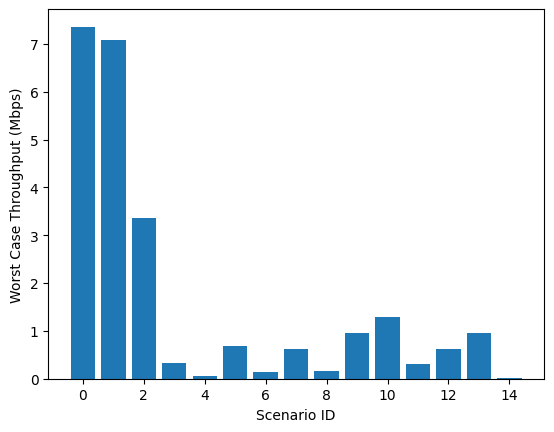

In [ ]:
# Plot worst_case_thr dictionary as a bar plot
import matplotlib.pyplot as plt

plt.bar(worst_case_thr.keys(), worst_case_thr.values())
plt.xlabel("Scenario ID")
plt.ylabel("Worst Case Throughput (Mbps)")
plt.savefig("/Users/wciezobka/Downloads/worst_case_thr.pdf", bbox_inches="tight")